# Analyses of Baby Name Popularity Distribution in U.S. for the Last 144 Years

In [2]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from datetime import datetime
import plotly



from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = 100

import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

## 1 Load Data

### 1.1 Last 144 Years Baby Name Dataset

In [3]:
file_path = '/Users/yingzhou/Downloads/Capstone_Babyname/Notebook_data/data.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, index_col=0)

# Display the first few rows to verify
print(data.head())

      Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio
0    Emily  2000      F  25959    6.867840          14.295257
1   Hannah  2000      F  23086    6.107745          12.713136
2  Madison  2000      F  19968    5.282832          10.996097
3   Ashley  2000      F  17998    4.761639           9.911246
4    Sarah  2000      F  17713    4.686238           9.754300


In [4]:
data.shape

(2117219, 6)

In [5]:
data['Name'].nunique

<bound method IndexOpsMixin.nunique of 0            Emily
1           Hannah
2          Madison
3           Ashley
4            Sarah
            ...   
2117214     Zyheem
2117215      Zykel
2117216     Zyking
2117217        Zyn
2117218      Zyran
Name: Name, Length: 2117219, dtype: object>

In [6]:
grouped = data.groupby(['Name', 'Year'])['Count'].sum().unstack()
grouped 

Year     1880  1881  1882  1883  1884  1885  1886  1887  1888  1889  1890  \
Name                                                                        
Aaban     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabha     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabid     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabidah   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabir     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Zyvion    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyvon     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyyanna   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyyon     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zzyzx     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Year     1891  1892  1893  1894  1895  1896  1897  1898  1899  1900  1901  \
Name                                                                        
Aaban     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabha     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabid     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabidah   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabir     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Zyvion    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyvon     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyyanna   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyyon     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zzyzx     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Year     1902  1903  1904  1905  1906  1907  1908  1909  1910  1911  1912  \
Name                                                                        
Aaban     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabha     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabid     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabidah   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabir     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Zyvion    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyvon     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyyanna   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyyon     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zzyzx     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Year     1913  1914  1915  1916  1917  1918  1919  1920  1921  1922  1923  \
Name                                                                        
Aaban     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabha     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabid     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabidah   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aabir     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Zyvion    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyvon     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyyanna   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zyyon     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zzyzx     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

In [7]:
file_path = '/Users/yingzhou/Downloads/Capstone_Babyname/Notebook_data/dataset4.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, index_col=0)
df

id                   name  African  Arab  Caribbean  European  \
0           595           Andre Agassi        0     0          0         1   
1           864            Andy Warhol        0     0          0         1   
2          1384    Amos Bronson Alcott        0     0          0         1   
3          1624         Andrew Johnson        0     0          0         1   
4          1806  Arnold Schwarzenegger        0     0          0         1   
...         ...                    ...      ...   ...        ...       ...   
25535  74560165         Tom Burckhardt        0     0          0         1   
25536  74565128      Sana Javeri Kadri        0     0          0         0   
25537  74566983            Bashar Wali        0     1          0         0   
25538  74584291         Ernest Lagarde        0     0          0         1   
25539  74586674       King Phojanakong        0     0          0         0   

       Greenlandic  indigenous peoples  Jewish  Middle Eastern  Romani  \
0                0                   1       0               1       0   
1                0                   0       0               0       0   
2                0                   0       0               0       0   
3                0                   0       0               0       0   
4                0                   0       0               0       0   
...            ...                 ...     ...             ...     ...   
25535            0                   0       0               0       0   
25536            0                   0       0               0       0   
25537            0                   0       0               1       0   
25538            0                   0       0               0       0   
25539            0                   0       0               0       0   

       North African  Iranian-African  African-Jewish  Egyptian  Angolan  \
0                  0                0               0         0        0   
1                  0                0               0         0        0   
2                  0                0               0         0        0   
3                  0                0               0         0        0   
4                  0                0               0         0        0   
...              ...              ...             ...       ...      ...   
25535              0                0               0         0        0   
25536              0                0               0         0        0   
25537              0                0               0         0        0   
25538              0                0               0         0        0   
25539              0                0               0         0        0   

       Beninese  Burkinabé  Burundian  Cameroonian  Cape Verdean  \
0             0          0          0            0             0   
1             0          0          0            0             0   
2             0          0          0            0             0   
3             0          0          0            0             0   
4             0          0          0            0             0   
...         ...        ...        ...          ...           ...   
25535         0          0          0            0             0   
25536         0          0          0            0             0   
25537         0          0          0            0             0   
25538         0          0          0            0             0   
25539         0          0          0            0             0   

       Central African Republic  Democratic Republic of the Congo  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   
...                         ...            

In [8]:
df['name'] = df['name'].str.split().str[0]

# Display the updated DataFrame
print(df[['id', 'name']].head())

     id    name
0   595   Andre
1   864    Andy
2  1384    Amos
3  1624  Andrew
4  1806  Arnold


In [9]:
df.shape

(25540, 493)

In [10]:
famous_people=df['name']

famous_people

0         Andre
1          Andy
2          Amos
3        Andrew
4        Arnold
          ...  
25535       Tom
25536      Sana
25537    Bashar
25538    Ernest
25539      King
Name: name, Length: 25540, dtype: object

## 2 Baby Name Key Insights

### 2.1 Baby Name Trendency over 143 Years

#### Top 1000 names vs. Name Occurances More than 10 times

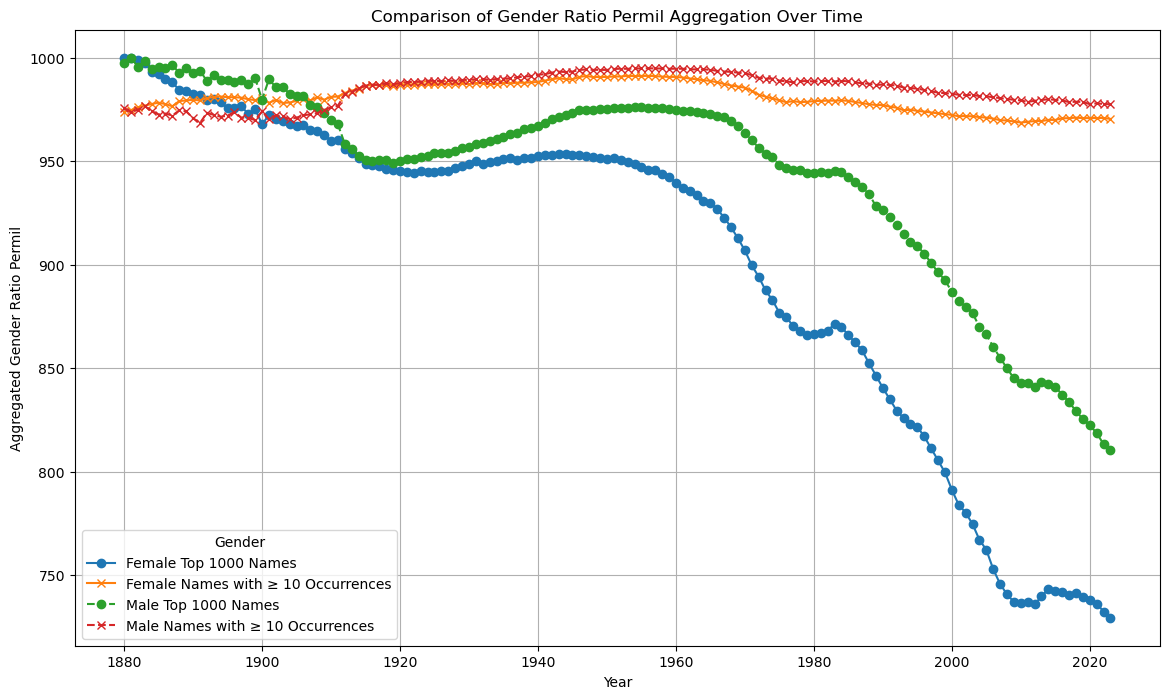

In [11]:
# Generalized function to aggregate name gender ratio over years
def aggregate_gender_data(data, gender, top_n=None, min_count=None):
    # Filter data for the specified gender
    gender_data = data[data['Gender'] == gender]
    
    # If filtering by minimum count (e.g., Count >= 10)
    if min_count is not None:
        gender_data = gender_data[gender_data['Count'] >= min_count]
    
    # Initialize an empty DataFrame to collect results
    aggregated_data = pd.DataFrame()
    
    # Iterate over each year
    for year in gender_data['Year'].unique():
        year_data = gender_data[gender_data['Year'] == year]
        
        # If top_n is provided, filter for the top N names by Count
        if top_n is not None:
            year_data = year_data.nlargest(top_n, 'Count')
        
        # Aggregate metrics for the selected names
        aggregated = year_data.groupby('Year').agg({
            'Gender_Name_Ratio': 'sum',
            'Name_Ratio': 'sum'
        }).reset_index()

        aggregated_data = pd.concat([aggregated_data, aggregated], ignore_index=True)
    
    # Sort the data by Year
    aggregated_data = aggregated_data.sort_values(by='Year').reset_index(drop=True)
    
    return aggregated_data

# Get aggregated data for female and male
top_female_1000 = aggregate_gender_data(data, 'F', top_n=1000)
top_male_1000 = aggregate_gender_data(data, 'M', top_n=1000)

filtered_female_10_or_more = aggregate_gender_data(data, 'F', min_count=10)
filtered_male_10_or_more = aggregate_gender_data(data, 'M', min_count=10)

# Plotting the results for Gender Name Ratio
plt.figure(figsize=(14, 8))

plt.plot(top_female_1000['Year'], top_female_1000['Gender_Name_Ratio'], marker='o', label='Female Top 1000 Names')
plt.plot(filtered_female_10_or_more['Year'], filtered_female_10_or_more['Gender_Name_Ratio'], marker='x', label='Female Names with ≥ 10 Occurrences')

plt.plot(top_male_1000['Year'], top_male_1000['Gender_Name_Ratio'], marker='o', linestyle='--', label='Male Top 1000 Names')
plt.plot(filtered_male_10_or_more['Year'], filtered_male_10_or_more['Gender_Name_Ratio'], marker='x', linestyle='--', label='Male Names with ≥ 10 Occurrences')

plt.title('Comparison of Gender Ratio Permil Aggregation Over Time')
plt.xlabel('Year')
plt.ylabel('Aggregated Gender Ratio Permil')
plt.legend(title='Gender')
plt.grid(True)


#### Top 1000 names vs. Popular Name Occurances More than 1000 times

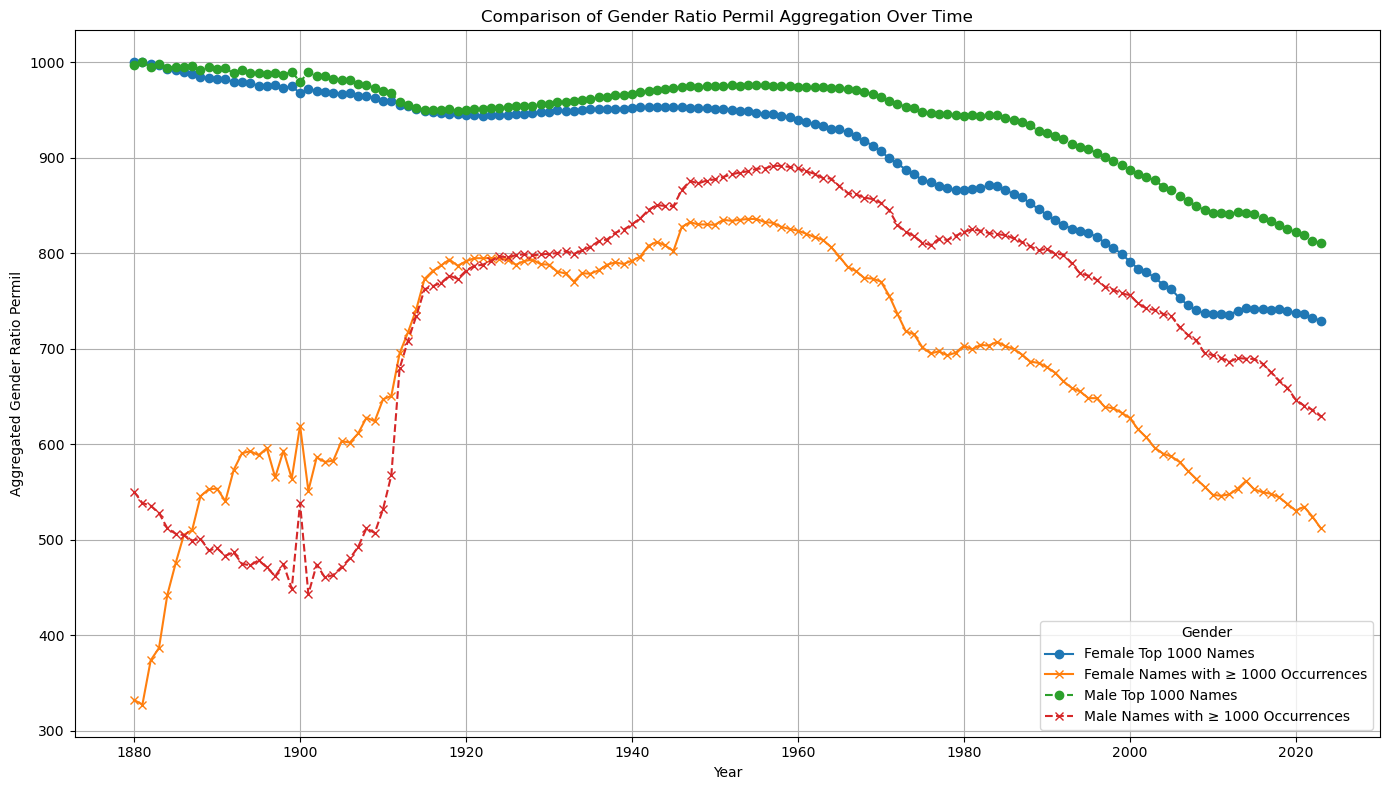

In [12]:
# Function to aggregate name gender ratio over years for top 1000 names
def aggregate_top_1000(data, gender):
    # Filter data for the specified gender
    gender_data = data[data['Gender'] == gender]
    
    # Initialize an empty DataFrame to collect results
    aggregated_data = pd.DataFrame()
    
    # Iterate over each year
    for year in gender_data['Year'].unique():
        year_data = gender_data[gender_data['Year'] == year]
        top_1000_names = year_data.nlargest(1000, 'Count')
        
        # Aggregate metrics for top 1000 names
        aggregated = top_1000_names.groupby('Year').agg({
            'Gender_Name_Ratio': 'sum',
            'Name_Ratio': 'sum'
        }).reset_index()

        aggregated_data = pd.concat([aggregated_data, aggregated], ignore_index=True)
    
    # Sort the data by Year
    aggregated_data = aggregated_data.sort_values(by='Year').reset_index(drop=True)
    
    return aggregated_data

# Function to aggregate name gender ratio over years excluding names with fewer than 10 occurrences
def aggregated_exclude_less_than_1000(data, gender):
    # Filter data for the specified gender
    gender_data = data[data['Gender'] == gender]
    
    # Exclude names with fewer than 10 occurrences
    gender_data = gender_data[gender_data['Count'] >= 1000]
    
    # Initialize an empty DataFrame to collect results
    aggregated_data = pd.DataFrame()
    
    # Iterate over each year
    for year in gender_data['Year'].unique():
        year_data = gender_data[gender_data['Year'] == year]
        top_1000_names = year_data.nlargest(1000, 'Count')
        
        # Aggregate metrics for top 1000 names
        aggregated = top_1000_names.groupby('Year').agg({
            'Gender_Name_Ratio': 'sum',
            'Name_Ratio': 'sum'
        }).reset_index()

        aggregated_data = pd.concat([aggregated_data, aggregated], ignore_index=True)
    
    # Sort the data by Year
    aggregated_data = aggregated_data.sort_values(by='Year').reset_index(drop=True)
    
    return aggregated_data

# Get aggregated data for female and male
top_female_1000 = aggregate_top_1000(data, 'F')
top_male_1000 = aggregate_top_1000(data, 'M')

filtered_female_1000_or_more = aggregated_exclude_less_than_1000(data, 'F')
filtered_male_1000_or_more = aggregated_exclude_less_than_1000(data, 'M')

# Plotting the results for Gender Name Ratio
plt.figure(figsize=(14, 8))

plt.plot(top_female_1000['Year'], top_female_1000['Gender_Name_Ratio'], marker='o', label='Female Top 1000 Names')
plt.plot(filtered_female_1000_or_more['Year'], filtered_female_1000_or_more['Gender_Name_Ratio'], marker='x', label='Female Names with ≥ 1000 Occurrences')

plt.plot(top_male_1000['Year'], top_male_1000['Gender_Name_Ratio'], marker='o', linestyle='--', label='Male Top 1000 Names')
plt.plot(filtered_male_1000_or_more['Year'], filtered_male_1000_or_more['Gender_Name_Ratio'], marker='x', linestyle='--', label='Male Names with ≥ 1000 Occurrences')

plt.title('Comparison of Gender Ratio Permil Aggregation Over Time')
plt.xlabel('Year')
plt.ylabel('Aggregated Gender Ratio Permil')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
def get_top_1000_each_year(data):
    # Group data by 'Year' and apply nlargest to get top 1000 names for each year
    top_1000_per_year = data.groupby('Year').apply(lambda x: x.nlargest(1000, 'Count')).reset_index(drop=True)
    return top_1000_per_year

# Update your dataframe to include only the top 1000 names for each year
top_1000_data = get_top_1000_each_year(data)

# Display the updated dataframe
print(top_1000_data)

           Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio
0          John  1880      M   9655   47.919438          87.383474
1       William  1880      M   9532   47.308967          86.270251
2          Mary  1880      F   7065   35.064819          77.642482
3         James  1880      M   5927   29.416728          53.642864
4       Charles  1880      M   5348   26.543051          48.402570
...         ...   ...    ...    ...         ...                ...
143995  Rodrigo  2023      M    606    0.183790           0.356214
143996    Uriel  2023      M    606    0.183790           0.356214
143997   Marlee  2023      F    605    0.183486           0.379067
143998    Lucca  2023      M    605    0.183486           0.355626
143999   Philip  2023      M    605    0.183486           0.355626

[144000 rows x 6 columns]


In [14]:
top_1000_data.to_csv('top_1000_data.csv')

## 3 Baby Name Feature Engineering

### Famous People Binary

In [15]:
# Extract the first names from the famous_people DataFrame (if not already done)
famous_people_set = set(famous_people)  # Convert famous people names to a set for faster lookup

# Add a binary column 'Is_Famous' to top_1000_data based on whether the name is in famous_people
top_1000_data['Is_Famous'] = top_1000_data['Name'].apply(lambda x: 1 if x in famous_people_set else 0)

# Display the updated dataframe
print(top_1000_data.head())


      Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio  Is_Famous
0     John  1880      M   9655   47.919438          87.383474          1
1  William  1880      M   9532   47.308967          86.270251          1
2     Mary  1880      F   7065   35.064819          77.642482          1
3    James  1880      M   5927   29.416728          53.642864          1
4  Charles  1880      M   5348   26.543051          48.402570          1


In [16]:
# Convert the 'Gender' column into binary: 1 for 'M' and 0 for 'F'
top_1000_data['Gender_Binary'] = top_1000_data['Gender'].map({'M': 1, 'F': 0})

# Display the updated dataframe
print(top_1000_data.head())

      Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio  Is_Famous  \
0     John  1880      M   9655   47.919438          87.383474          1   
1  William  1880      M   9532   47.308967          86.270251          1   
2     Mary  1880      F   7065   35.064819          77.642482          1   
3    James  1880      M   5927   29.416728          53.642864          1   
4  Charles  1880      M   5348   26.543051          48.402570          1   

   Gender_Binary  
0              1  
1              1  
2              0  
3              1  
4              1  


### Year of Last Appearance

In [17]:
# Calculate the Year of Last Appearance
# Group by 'Name' and find the max 'Year' for each name
last_appearance = top_1000_data.groupby('Name')['Year'].max().reset_index()

# Rename the column to 'Year_of_Last_Appearance'
last_appearance = last_appearance.rename(columns={'Year': 'Year_of_Last_Appearance'})

# Merge this information back into the original dataframe
data1 = top_1000_data.merge(last_appearance, on='Name', how='left')

# Display the updated dataframe
print(data1.head())

      Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio  Is_Famous  \
0     John  1880      M   9655   47.919438          87.383474          1   
1  William  1880      M   9532   47.308967          86.270251          1   
2     Mary  1880      F   7065   35.064819          77.642482          1   
3    James  1880      M   5927   29.416728          53.642864          1   
4  Charles  1880      M   5348   26.543051          48.402570          1   

   Gender_Binary  Year_of_Last_Appearance  
0              1                     2023  
1              1                     2023  
2              0                     2023  
3              1                     2023  
4              1                     2023  


### Top 100 Names

In [18]:
# Function to get top 100 names for each year
def get_top_100_per_year(data):
    top_100_per_year = data.groupby('Year').apply(lambda x: x.nlargest(100, 'Count')).reset_index(drop=True)
    return top_100_per_year

# Get top 100 names for each year
top_100_per_year = get_top_100_per_year(data1)

In [19]:
# Merge the top 100 names back to the original DataFrame
data1 = data1.merge(top_100_per_year[['Year', 'Name']], on=['Year', 'Name'], how='left', indicator=True)

# Create the binary column 'Is_Top_100'
data1['Is_Top_100'] = (data1['_merge'] == 'both').astype(int)

# Drop the '_merge' column
data1 = data1.drop(columns=['_merge'])

# Display the updated DataFrame
print(data1)


           Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio  Is_Famous  \
0          John  1880      M   9655   47.919438          87.383474          1   
1       William  1880      M   9532   47.308967          86.270251          1   
2          Mary  1880      F   7065   35.064819          77.642482          1   
3         James  1880      M   5927   29.416728          53.642864          1   
4       Charles  1880      M   5348   26.543051          48.402570          1   
...         ...   ...    ...    ...         ...                ...        ...   
144037  Rodrigo  2023      M    606    0.183790           0.356214          1   
144038    Uriel  2023      M    606    0.183790           0.356214          0   
144039   Marlee  2023      F    605    0.183486           0.379067          0   
144040    Lucca  2023      M    605    0.183486           0.355626          0   
144041   Philip  2023      M    605    0.183486           0.355626          1   

        Gender_Binary  Year

### Rolling Averages

In [20]:
# Calculate a 5-year rolling average for the 'Count' column
data1['Rolling_Average_Count_5_Years'] = data1.groupby('Name')['Count'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

# Calculate a 5-year rolling average for the 'Gender_Ratio' column
data1['Rolling_Average_Gender_Ratio_5_Years'] = data1.groupby('Name')['Gender_Name_Ratio'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

# Calculate a 5-year rolling average for the National Ratio
data1['Rolling_Average_National_Ratio_5_Years'] = data1.groupby('Name')['Name_Ratio'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

data2 = data1.sort_values(by=['Name', 'Year'])

# Display the updated dataframe with both rolling averages
print(data2.head(10))

           Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio  Is_Famous  \
128731    Aaden  2008      M    958    0.243760           0.469689          0   
129570    Aaden  2009      M   1268    0.331981           0.639458          0   
114438  Aaliyah  1994      F   1451    0.390318           0.812591          0   
115498  Aaliyah  1995      F   1256    0.342980           0.714250          0   
116688  Aaliyah  1996      F    831    0.227856           0.474070          0   
117404  Aaliyah  1997      F   1739    0.479641           0.999072          0   
118490  Aaliyah  1998      F   1399    0.380361           0.791813          0   
119601  Aaliyah  1999      F   1088    0.294552           0.613397          0   
120478  Aaliyah  2000      F   1496    0.395789           0.823826          0   
121251  Aaliyah  2001      F   3352    0.895475           1.861712          0   

        Gender_Binary  Year_of_Last_Appearance  Is_Top_100  \
128731              1                     2009

### Yearly changes

In [21]:
# The NAN data is filled with 0

In [22]:
# Sorted by 'Name' and 'Year' 
data1 = data1.sort_values(by=['Name', 'Year'])

# Calculate yearly change for 'Count'
data1['Yearly_Change_Count'] = data1.groupby('Name')['Count'].diff().fillna(0)

# Calculate yearly change for 'Gender_Name_Ratio'
data1['Yearly_Change_Gender_Ratio'] = data1.groupby('Name')['Gender_Name_Ratio'].diff().fillna(0)

# Calculate yearly change for 'Name_Ratio'
data1['Yearly_Change_National_Ratio'] = data1.groupby('Name')['Name_Ratio'].diff().fillna(0)

# Sort the DataFrame again (optional, if needed)
data2 = data1.sort_values(by=['Name', 'Year'])

# Display the updated DataFrame with yearly changes
print(data2.head(10))

           Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio  Is_Famous  \
128731    Aaden  2008      M    958    0.243760           0.469689          0   
129570    Aaden  2009      M   1268    0.331981           0.639458          0   
114438  Aaliyah  1994      F   1451    0.390318           0.812591          0   
115498  Aaliyah  1995      F   1256    0.342980           0.714250          0   
116688  Aaliyah  1996      F    831    0.227856           0.474070          0   
117404  Aaliyah  1997      F   1739    0.479641           0.999072          0   
118490  Aaliyah  1998      F   1399    0.380361           0.791813          0   
119601  Aaliyah  1999      F   1088    0.294552           0.613397          0   
120478  Aaliyah  2000      F   1496    0.395789           0.823826          0   
121251  Aaliyah  2001      F   3352    0.895475           1.861712          0   

        Gender_Binary  Year_of_Last_Appearance  Is_Top_100  \
128731              1                     2009

### Name length

In [23]:
# Calculate the length of each name
data2['Name_Length'] = data2['Name'].apply(len)
print(data2.head(10))

           Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio  Is_Famous  \
128731    Aaden  2008      M    958    0.243760           0.469689          0   
129570    Aaden  2009      M   1268    0.331981           0.639458          0   
114438  Aaliyah  1994      F   1451    0.390318           0.812591          0   
115498  Aaliyah  1995      F   1256    0.342980           0.714250          0   
116688  Aaliyah  1996      F    831    0.227856           0.474070          0   
117404  Aaliyah  1997      F   1739    0.479641           0.999072          0   
118490  Aaliyah  1998      F   1399    0.380361           0.791813          0   
119601  Aaliyah  1999      F   1088    0.294552           0.613397          0   
120478  Aaliyah  2000      F   1496    0.395789           0.823826          0   
121251  Aaliyah  2001      F   3352    0.895475           1.861712          0   

        Gender_Binary  Year_of_Last_Appearance  Is_Top_100  \
128731              1                     2009

### Name vowels

In [24]:
# Define a function to count vowels and consonants
def count_vowels(name):
    vowels = 'AEIOUaeiou'
    return sum(1 for char in name if char in vowels)

def count_consonants(name):
    vowels = 'AEIOUaeiou'
    return sum(1 for char in name if char.isalpha() and char not in vowels)

# Calculate vowel and consonant counts
data2['Vowel_Count'] = data2['Name'].apply(count_vowels)
data2['Consonant_Count'] = data2['Name'].apply(count_consonants)
data2['Vowel_Ratio'] = (data2['Vowel_Count']/data2['Name_Length'])

# Display the updated dataframe
print(data2.head(10))

           Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio  Is_Famous  \
128731    Aaden  2008      M    958    0.243760           0.469689          0   
129570    Aaden  2009      M   1268    0.331981           0.639458          0   
114438  Aaliyah  1994      F   1451    0.390318           0.812591          0   
115498  Aaliyah  1995      F   1256    0.342980           0.714250          0   
116688  Aaliyah  1996      F    831    0.227856           0.474070          0   
117404  Aaliyah  1997      F   1739    0.479641           0.999072          0   
118490  Aaliyah  1998      F   1399    0.380361           0.791813          0   
119601  Aaliyah  1999      F   1088    0.294552           0.613397          0   
120478  Aaliyah  2000      F   1496    0.395789           0.823826          0   
121251  Aaliyah  2001      F   3352    0.895475           1.861712          0   

        Gender_Binary  Year_of_Last_Appearance  Is_Top_100  \
128731              1                     2009

### Name Endings with A, E, I

Many female names tend to end with the letters "a," "e," or "i." This characteristic could be an interesting feature to analyze when studying name patterns and trends. Exploring how frequently female names end with these letters may provide valuable insights into naming conventions and preferences over time.

https://pubmed.ncbi.nlm.nih.gov/11026389/#:~:text=Most%20female%20names%20end%20with,similar%20frequency%20for%20both%20sexes.

In [25]:
# Function to check if a name ends with one of the specified letters
def ends_with(name, letters):
    return any(name.endswith(letter) for letter in letters)

# List of letters to check
end_letters = ['a', 'e', 'i']

# Create a new column 'Ends_With_Specified_Letters'
data2['Ends_With_Specified_Letters'] = \
          data2['Name'].apply(lambda x: int(ends_with(x, end_letters)))
print(data2)

           Name  Year Gender  Count  Name_Ratio  Gender_Name_Ratio  Is_Famous  \
128731    Aaden  2008      M    958    0.243760           0.469689          0   
129570    Aaden  2009      M   1268    0.331981           0.639458          0   
114438  Aaliyah  1994      F   1451    0.390318           0.812591          0   
115498  Aaliyah  1995      F   1256    0.342980           0.714250          0   
116688  Aaliyah  1996      F    831    0.227856           0.474070          0   
...         ...   ...    ...    ...         ...                ...        ...   
143482     Zuri  2023      F   1471    0.446130           0.921666          0   
140946   Zyaire  2020      M    671    0.201028           0.389290          0   
141802   Zyaire  2021      M    833    0.246108           0.476954          0   
142778   Zyaire  2022      M    869    0.257206           0.498865          0   
143664   Zyaire  2023      M   1029    0.312079           0.604859          0   

        Gender_Binary  Year

In [26]:
# Check for null values
null_values = data2.isna().sum()

null_values

Name                                      0
Year                                      0
Gender                                    0
Count                                     0
Name_Ratio                                0
Gender_Name_Ratio                         0
Is_Famous                                 0
Gender_Binary                             0
Year_of_Last_Appearance                   0
Is_Top_100                                0
Rolling_Average_Count_5_Years             0
Rolling_Average_Gender_Ratio_5_Years      0
Rolling_Average_National_Ratio_5_Years    0
Yearly_Change_Count                       0
Yearly_Change_Gender_Ratio                0
Yearly_Change_National_Ratio              0
Name_Length                               0
Vowel_Count                               0
Consonant_Count                           0
Vowel_Ratio                               0
Ends_With_Specified_Letters               0
dtype: int64

In [27]:
data2.to_csv('Featured_Data.csv')

In [28]:
df_num= data2.select_dtypes('number')

In [29]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144042 entries, 128731 to 143664
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Year                                    144042 non-null  int64  
 1   Count                                   144042 non-null  int64  
 2   Name_Ratio                              144042 non-null  float64
 3   Gender_Name_Ratio                       144042 non-null  float64
 4   Is_Famous                               144042 non-null  int64  
 5   Gender_Binary                           144042 non-null  int64  
 6   Year_of_Last_Appearance                 144042 non-null  int64  
 7   Is_Top_100                              144042 non-null  int64  
 8   Rolling_Average_Count_5_Years           144042 non-null  float64
 9   Rolling_Average_Gender_Ratio_5_Years    144042 non-null  float64
 10  Rolling_Average_National_Ratio_5_Years 

In [30]:
df_num.describe().T

count         mean          std  \
Year                                    144042.0  1951.492523    41.569789   
Count                                   144042.0  2161.133385  5255.961871   
Name_Ratio                              144042.0     0.870970     2.030888   
Gender_Name_Ratio                       144042.0     1.739263     4.107321   
Is_Famous                               144042.0     0.802002     0.398492   
Gender_Binary                           144042.0     0.448175     0.497309   
Year_of_Last_Appearance                 144042.0  1996.102297    32.006015   
Is_Top_100                              144042.0     0.108454     0.310955   
Rolling_Average_Count_5_Years           144042.0  2134.279382  4911.032210   
Rolling_Average_Gender_Ratio_5_Years    144042.0     1.747132     3.653994   
Rolling_Average_National_Ratio_5_Years  144042.0     0.874869     1.823506   
Yearly_Change_Count                     144042.0    13.123325  3578.162712   
Yearly_Change_Gender_Ratio              144042.0    -0.004785     3.889111   
Yearly_Change_National_Ratio            144042.0    -0.002385     1.868025   
Name_Length                             144042.0     5.790714     1.453473   
Vowel_Count                             144042.0     2.386526     0.876096   
Consonant_Count                         144042.0     3.404188     1.125476   
Vowel_Ratio                             144042.0     0.414709     0.122829   
Ends_With_Specified_Letters             144042.0     0.450230     0.497518   

                                                 min          25%  \
Year                                     1880.000000  1915.000000   
Count                                      12.000000   289.000000   
Name_Ratio                                  0.062277     0.147566   
Gender_Name_Ratio                           0.103175     0.297615   
Is_Famous                                   0.000000     1.000000   
Gender_Binary                               0.000000     0.000000   
Year_of_Last_Appearance                  1880.000000  1977.000000   
Is_Top_100                                  0.000000     0.000000   
Rolling_Average_Count_5_Years              12.000000   279.000000   
Rolling_Average_Gender_Ratio_5_Years        0.103332     0.304378   
Rolling_Average_National_Ratio_5_Years      0.062277     0.150527   
Yearly_Change_Count                    -94504.000000   -53.000000   
Yearly_Change_Gender_Ratio                -86.877946    -0.054768   
Yearly_Change_National_Ratio              -47.691132    -0.027546   
Name_Length                                 2.000000     5.000000   
Vowel_Count                                 0.000000     2.000000   
Consonant_Count                             1.000000     3.000000   
Vowel_Ratio                                 0.000000     0.333333   
Ends_With_Specified_Letters                 0.000000     0.000000   

                                                50%          75%           max  
Year                                    1951.000000  1987.000000   2023.000000  
Count                                    707.000000  1803.000000  99693.000000  
Name_Ratio                                 0.279933     0.723654     47.919438  
Gender_Name_Ratio                          0.564183     1.450780     87.383474  
Is_Famous                                  1.000000     1.000000      1.000000  
Gender_Binary                              0.000000     1.000000      1.000000  
Year_of_Last_Appearance                 2008.000000  2023.000000   2023.000000  
Is_Top_100                                 0.000000     0.000000      1.000000  
Rolling_Average_Count_5_Years            713.000000  1834.400000  90200.400000  
Rolling_Average_Gender_Ratio_5_Years       0.582675     1.496027     87.383474  
Rolling_Average_National_Ratio_5_Years     0.288147     0.746283     47.919438  
Yearly_Change_Count                        0.000000    51.000000  94511.000000  
Yearly_Change_Gender_Ratio                -0.004

In [31]:
df_num.describe()[5:6].T

50%
Year                                    1951.000000
Count                                    707.000000
Name_Ratio                                 0.279933
Gender_Name_Ratio                          0.564183
Is_Famous                                  1.000000
Gender_Binary                              0.000000
Year_of_Last_Appearance                 2008.000000
Is_Top_100                                 0.000000
Rolling_Average_Count_5_Years            713.000000
Rolling_Average_Gender_Ratio_5_Years       0.582675
Rolling_Average_National_Ratio_5_Years     0.288147
Yearly_Change_Count                        0.000000
Yearly_Change_Gender_Ratio                -0.004676
Yearly_Change_National_Ratio              -0.002363
Name_Length                                6.000000
Vowel_Count                                2.000000
Consonant_Count                            3.000000
Vowel_Ratio                                0.400000
Ends_With_Specified_Letters                0.000000

## 4 EDA

In [32]:
df_num.corr()

Year     Count  Name_Ratio  \
Year                                    1.000000  0.161373   -0.036903   
Count                                   0.161373  1.000000    0.808958   
Name_Ratio                             -0.036903  0.808958    1.000000   
Gender_Name_Ratio                      -0.036519  0.794971    0.984114   
Is_Famous                               0.022244  0.139246    0.140974   
Gender_Binary                           0.038012  0.061471    0.031794   
Year_of_Last_Appearance                 0.499322  0.214088    0.178174   
Is_Top_100                             -0.004903  0.598258    0.654743   
Rolling_Average_Count_5_Years           0.181041  0.946414    0.733497   
Rolling_Average_Gender_Ratio_5_Years   -0.040141  0.775052    0.905704   
Rolling_Average_National_Ratio_5_Years -0.040081  0.782616    0.917826   
Yearly_Change_Count                    -0.005529  0.340546    0.366629   
Yearly_Change_Gender_Ratio              0.000359  0.254031    0.443106   
Yearly_Change_National_Ratio            0.000310  0.263370    0.451003   
Name_Length                             0.064136  0.020737   -0.003307   
Vowel_Count                            -0.000330 -0.051397   -0.055173   
Consonant_Count                         0.083084  0.066790    0.038677   
Vowel_Ratio                            -0.059804 -0.083985   -0.068576   
Ends_With_Specified_Letters            -0.108637 -0.108585   -0.083264   

                                        Gender_Name_Ratio  Is_Famous  \
Year                                            -0.036519   0.022244   
Count                                            0.794971   0.139246   
Name_Ratio                                       0.984114   0.140974   
Gender_Name_Ratio                                1.000000   0.142513   
Is_Famous                                        0.142513   1.000000   
Gender_Binary                                    0.054047   0.179363   
Year_of_Last_Appearance                          0.181397   0.348909   
Is_Top_100                                       0.641330   0.155370   
Rolling_Average_Count_5_Years                    0.719548   0.148571   
Rolling_Average_Gender_Ratio_5_Years             0.912779   0.161862   
Rolling_Average_National_Ratio_5_Years           0.897949   0.158753   
Yearly_Change_Count                              0.364012   0.000216   
Yearly_Change_Gender_Ratio                       0.465685  -0.000931   
Yearly_Change_National_Ratio                     0.456527  -0.001016   
Name_Length                                     -0.002146  -0.083339   
Vowel_Count                                     -0.059950  -0.096889   
Consonant_Count                                  0.043895  -0.032206   
Vowel_Ratio                                     -0.076258  -0.055962   
Ends_With_Specified_Letters                     -0.093354  -0.148945   

                                        Gender_Binary  \
Year                                         0.038012   
Count                                        0.061471   
Name_Ratio                                   0.031794   
Gender_Name_Ratio                            0.054047   
Is_Famous                                    0.179363   
Gender_Binary                                1.000000   
Year_of_Last_Appearance                      0.150653   
Is_Top_100                                   0.012733   
Rolling_Average_Count_5_Years                0.052629   
Rolling_Average_Gender_Ratio_5_Years         0.038943   
Rolling_Average_National_Ratio_5_Years       0.018641   
Yearly_Change_Count                          0.037629   
Yearly_Change_Gender_Ratio                   0.044520   
Yearly_Change_National_Ratio                 0.035611   
Name_Length                                 -0.083679   
Vowel_Count                                 -0.300835   
Consonant_Count                              0.126112   
Vowel_Ratio                                 -0.308932   
Ends_With_Specified_Letters            

In [33]:
df_num.corr()[7:8].T

Is_Top_100
Year                                     -0.004903
Count                                     0.598258
Name_Ratio                                0.654743
Gender_Name_Ratio                         0.641330
Is_Famous                                 0.155370
Gender_Binary                             0.012733
Year_of_Last_Appearance                   0.180284
Is_Top_100                                1.000000
Rolling_Average_Count_5_Years             0.628658
Rolling_Average_Gender_Ratio_5_Years      0.722628
Rolling_Average_National_Ratio_5_Years    0.730472
Yearly_Change_Count                       0.005373
Yearly_Change_Gender_Ratio               -0.002792
Yearly_Change_National_Ratio             -0.002752
Name_Length                              -0.005338
Vowel_Count                              -0.054518
Consonant_Count                           0.035544
Vowel_Ratio                              -0.061081
Ends_With_Specified_Letters              -0.080932

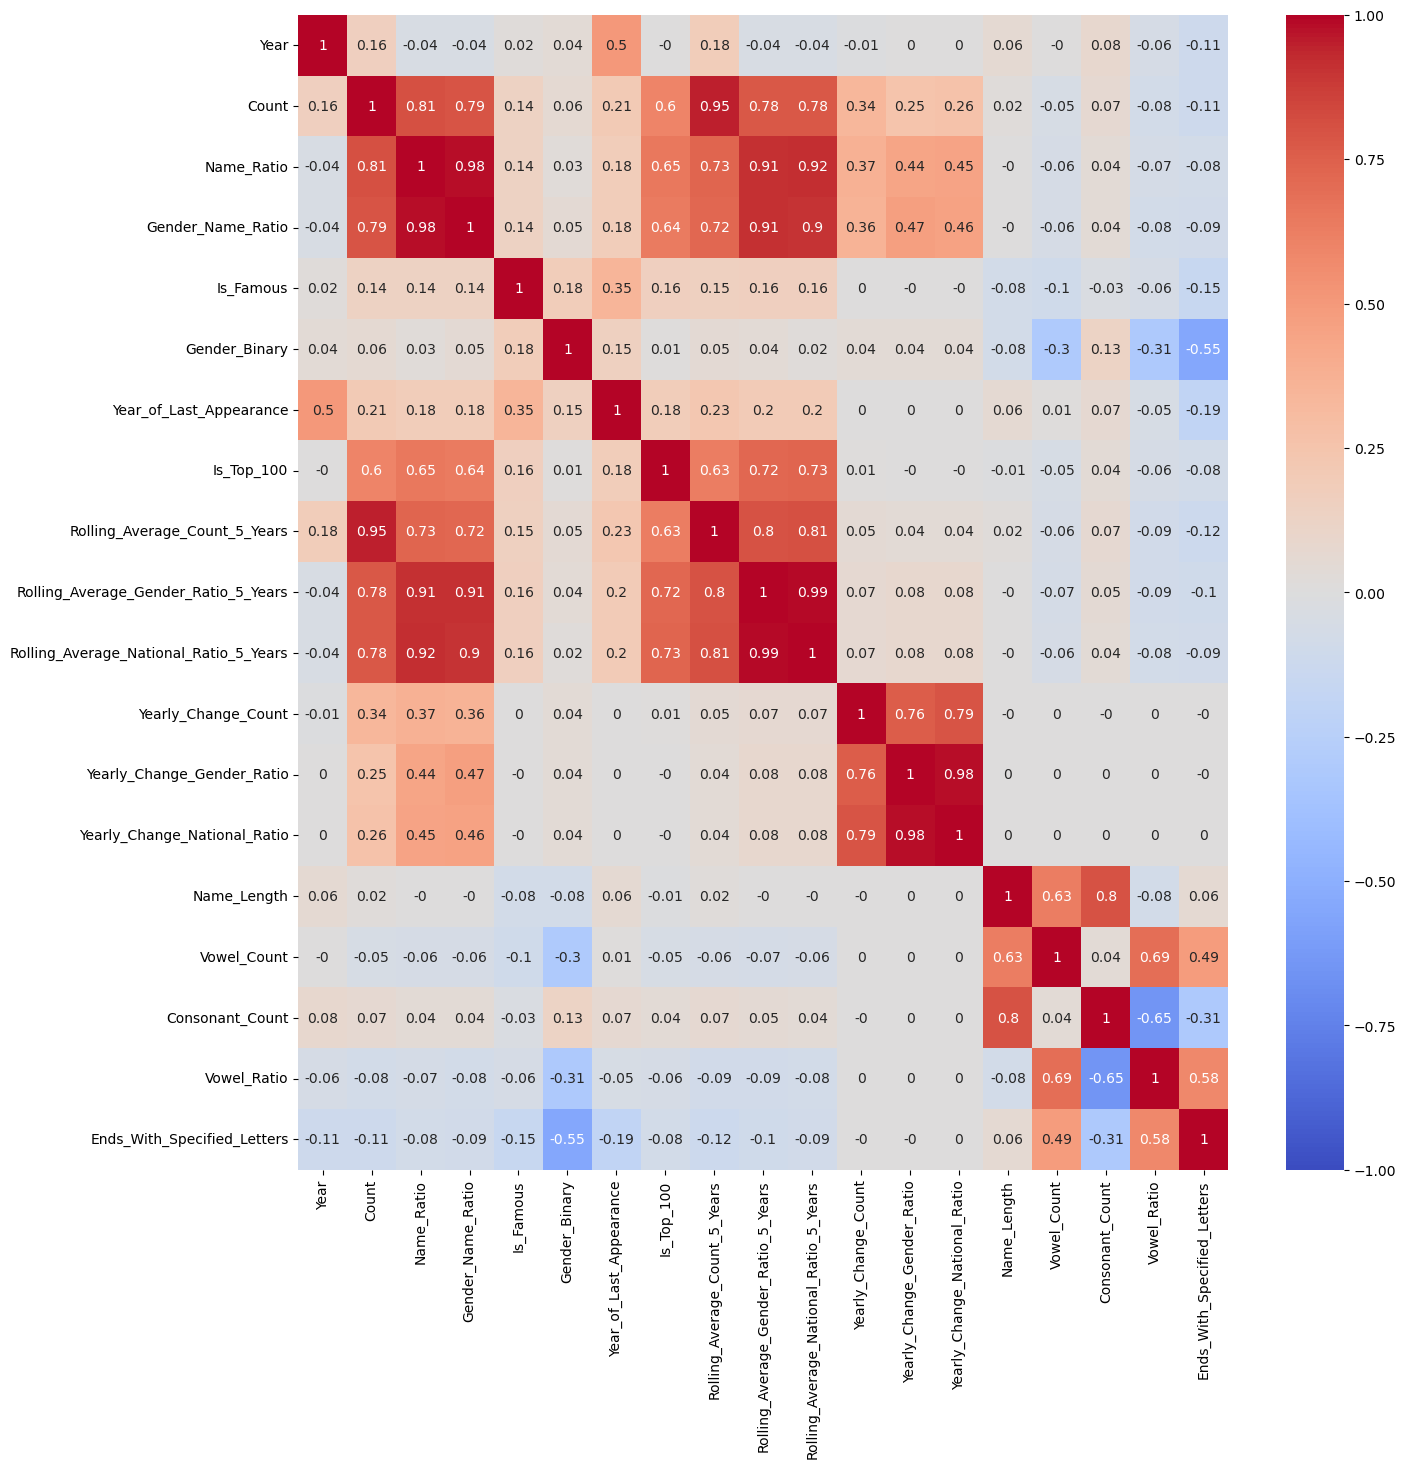

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(df_num.corr().round(2), vmin=-1,vmax=1, cmap='coolwarm',annot=True)
plt.show()

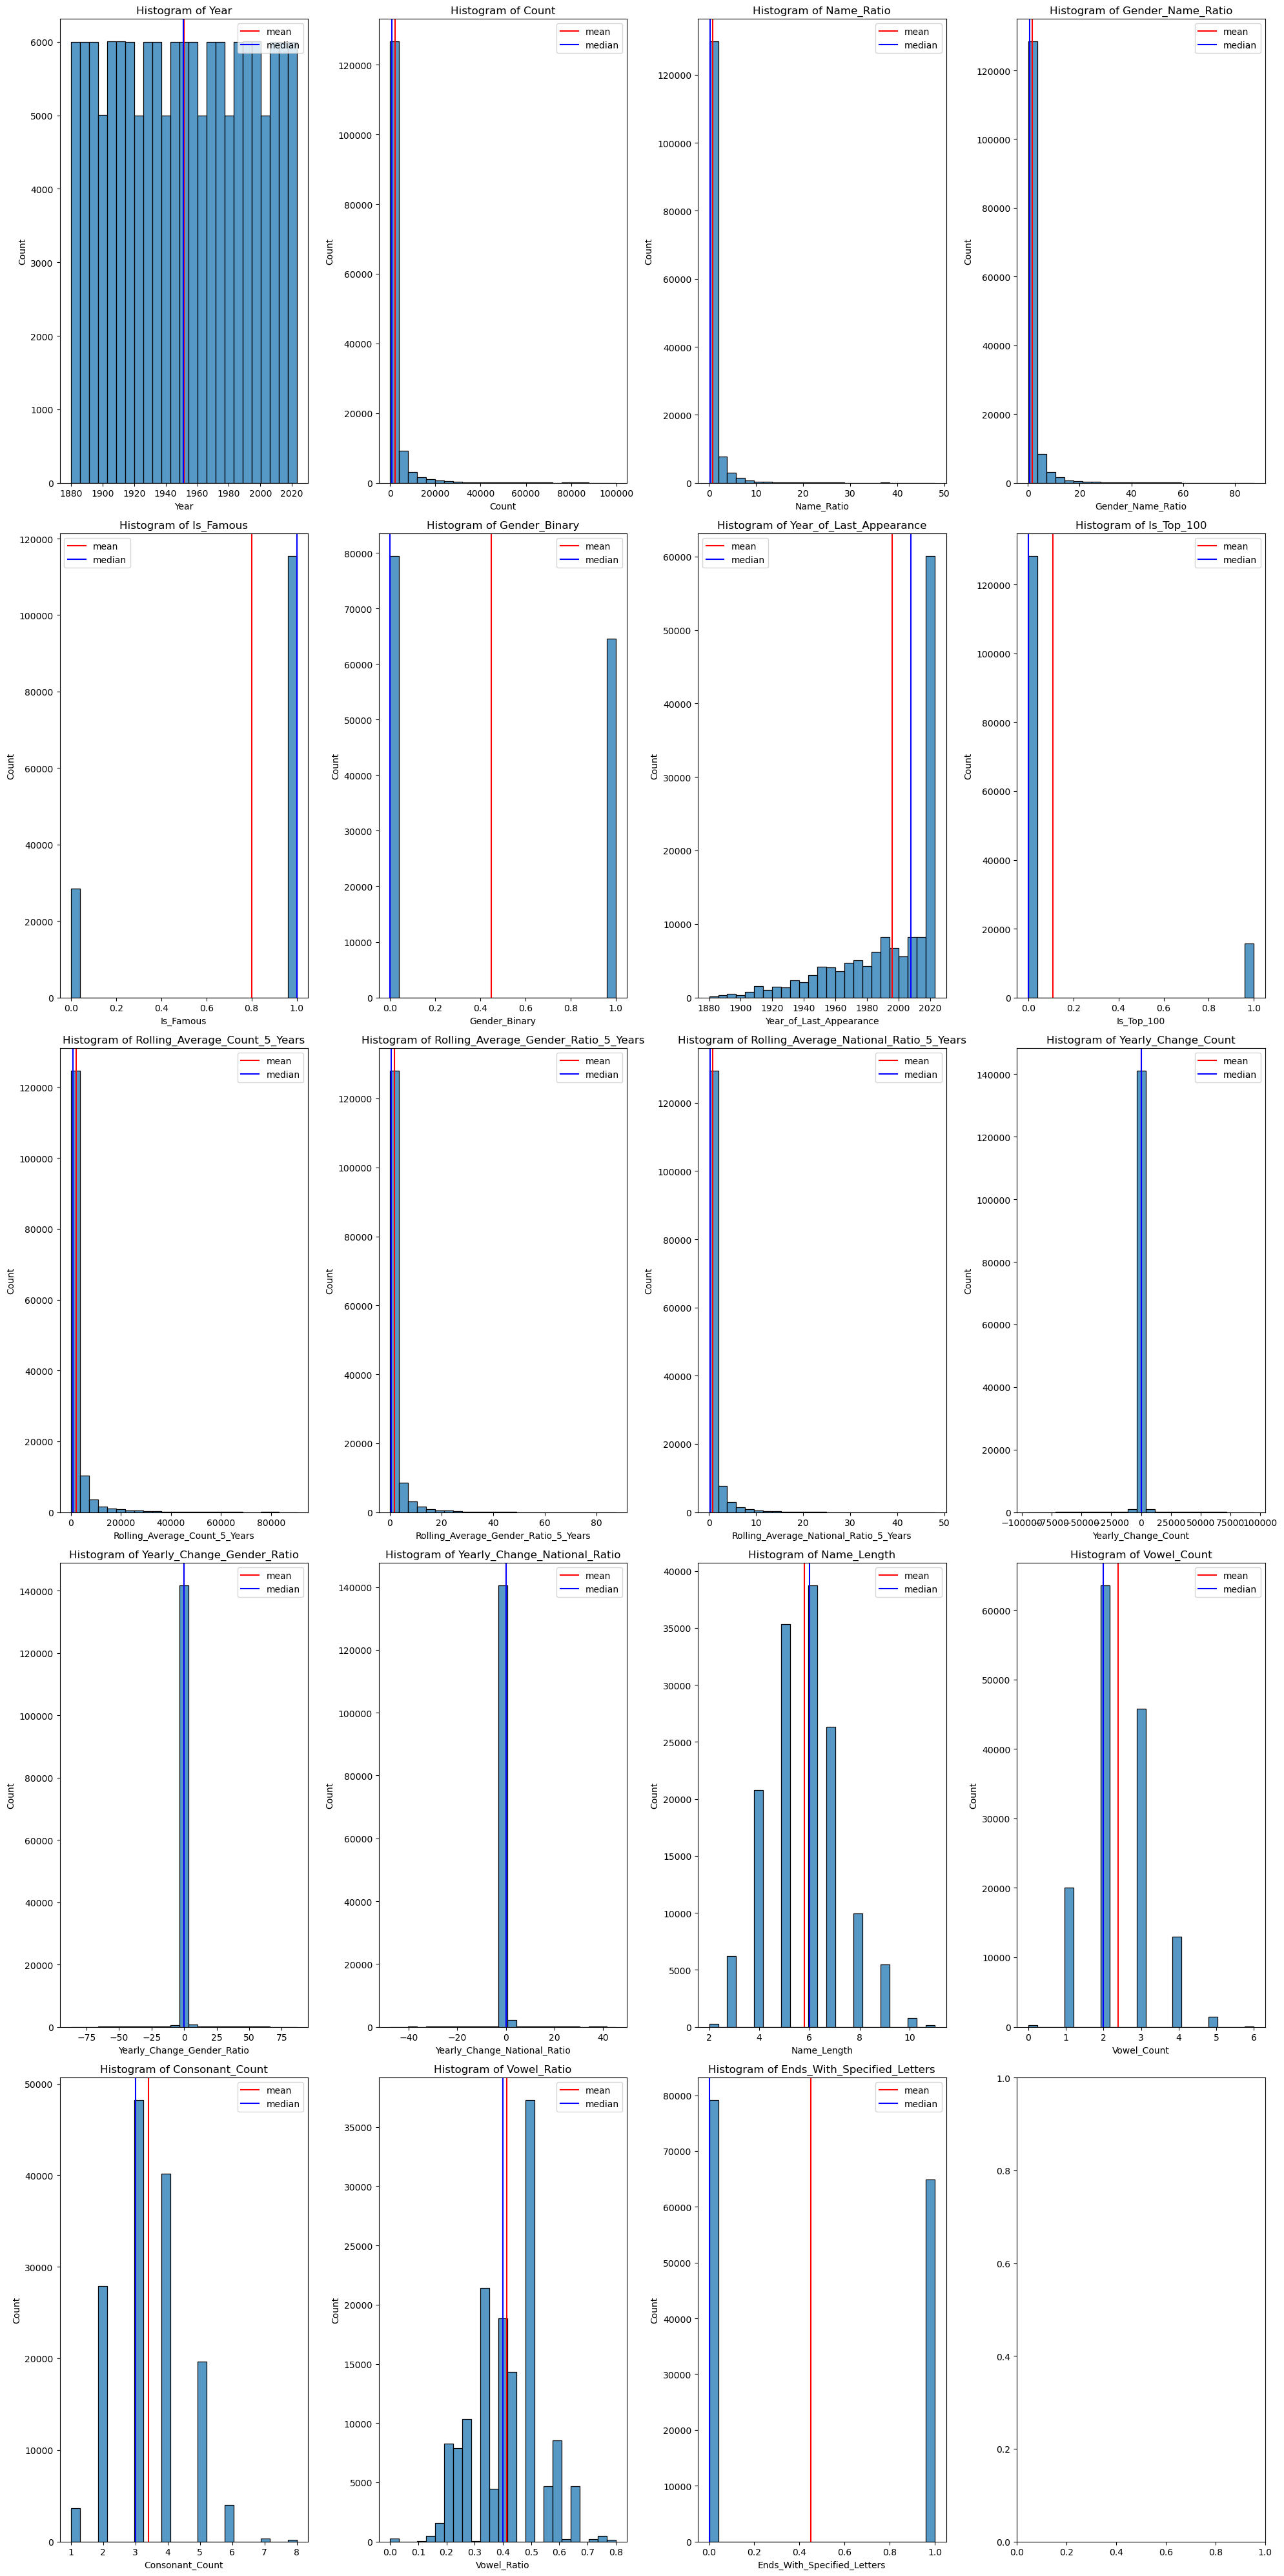

In [35]:
plt.subplots(5,4, figsize=(20,40))
for i, col in enumerate(df_num.columns):
    plt.subplot(5, 4, i+1)
    sns.histplot(df_num[col], bins=25)
    plt.axvline(df_num[col].mean(), label='mean', color='red')
    plt.axvline(df_num[col].median(), label='median', color='blue')
    plt.title(f'Histogram of {col}')
    plt.legend()
plt.tight_layout()
plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Define column groups
binary_features = ['Is_Famous', 'Gender_Binary', 'Ends_With_Specified_Letters']
continuous_features = [
    'Year', 'Count', 'Name_Ratio', 'Gender_Name_Ratio', 'Year_of_Last_Appearance',
    'Rolling_Average_Count_5_Years', 'Rolling_Average_Gender_Ratio_5_Years',
    'Rolling_Average_National_Ratio_5_Years', 'Yearly_Change_Count',
    'Yearly_Change_Gender_Ratio', 'Yearly_Change_National_Ratio', 'Name_Length',
    'Vowel_Count', 'Consonant_Count', 'Vowel_Ratio'
]

# Create preprocessing transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', 'passthrough', binary_features),  # Leave binary features as they are
        ('continuous', Pipeline([
            ('scaler', StandardScaler()),  # Apply StandardScaler to continuous features
            ('transformer', PowerTransformer())  # Apply PowerTransformer if needed
        ]), continuous_features)
    ]
)

# Initialize and fit the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Split the data
X = df_num.drop('Is_Top_100', axis=1)
y = df_num['Is_Top_100']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
pipeline.fit(X_train)
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Get feature names after transformation
# For continuous features
continuous_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['scaler'].get_feature_names_out()
# For binary features, they remain the same
binary_feature_names = binary_features

# Combine feature names
feature_names = list(binary_feature_names) + list(continuous_feature_names)

# Create DataFrames for transformed data
df_train_scaled = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train.index)
df_test_scaled = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)



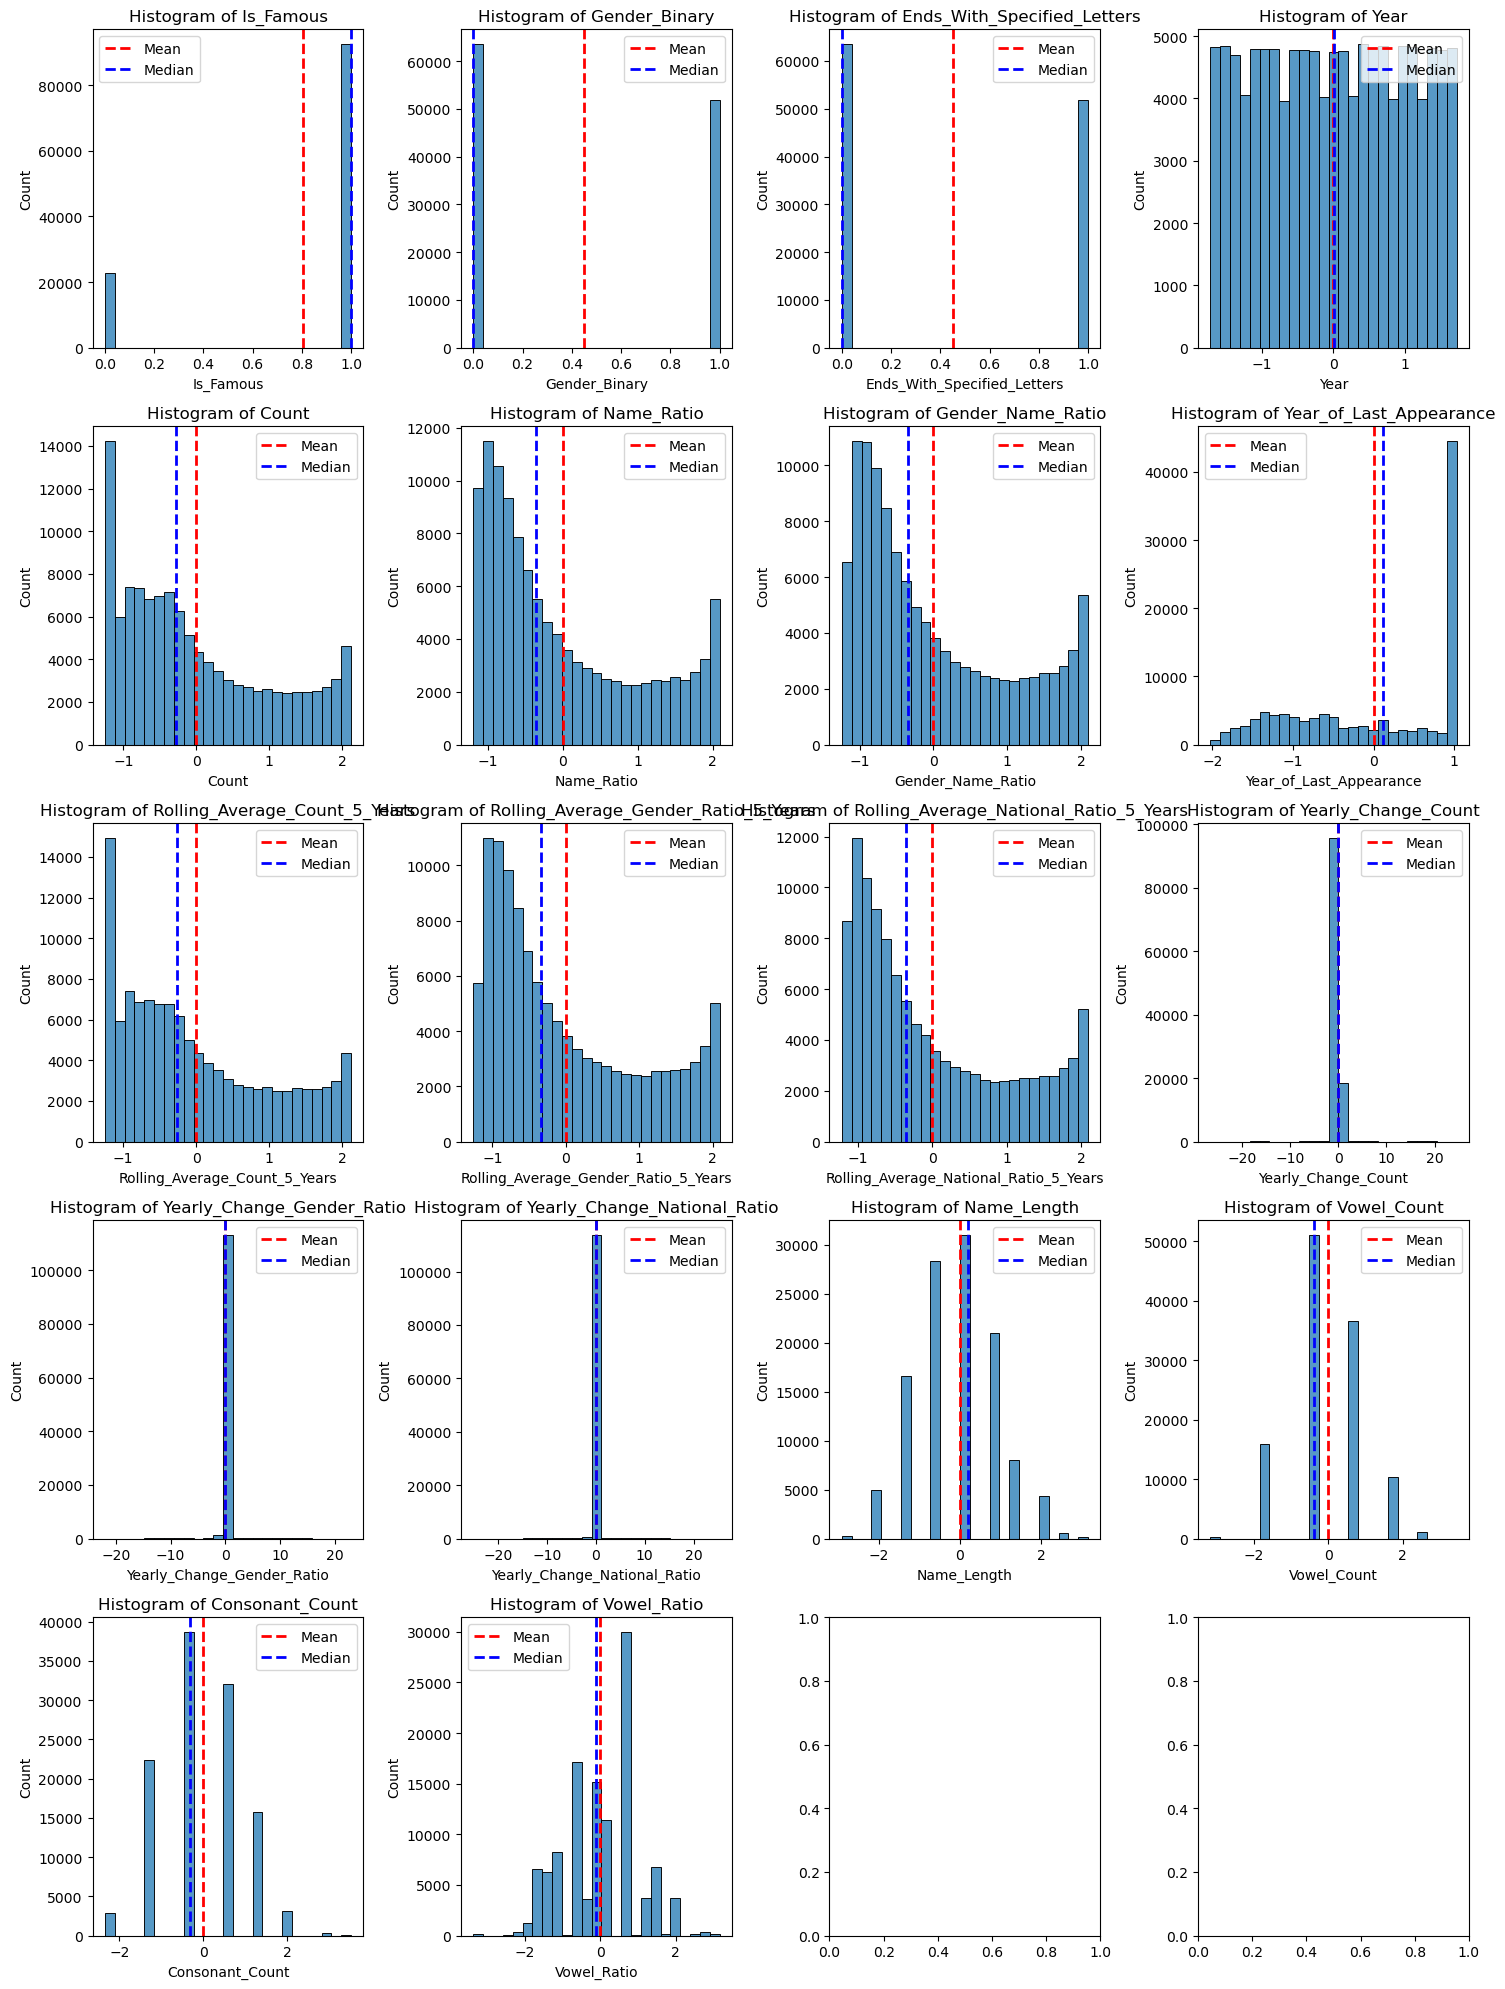

In [37]:

plt.subplots(5, 4, figsize=(15, 20))

for idx, col in enumerate(df_train_scaled.columns):
    plt.subplot(5, 4, idx + 1)
    sns.histplot(df_train_scaled[col], bins=25)
    plt.axvline(df_train_scaled[col].mean(), label="Mean", color='red', ls ='--', lw=2)
    plt.axvline(df_train_scaled[col].median(), label="Median", color='blue', ls ='--', lw=2)
    plt.title(f'Histogram of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

## Part 4 - Modelling

### Part 4.1 - Logistic Regression Model 

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

### All Features

In [39]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = df_num.drop(columns=['Is_Top_100'])   
y = df_num['Is_Top_100']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Classification Report
class_report = classification_report(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)


Training Accuracy: 0.9875
Test Accuracy: 0.9867
Confusion Matrix:
[[25555   131]
 [  252  2871]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25686
           1       0.96      0.92      0.94      3123

    accuracy                           0.99     28809
   macro avg       0.97      0.96      0.97     28809
weighted avg       0.99      0.99      0.99     28809



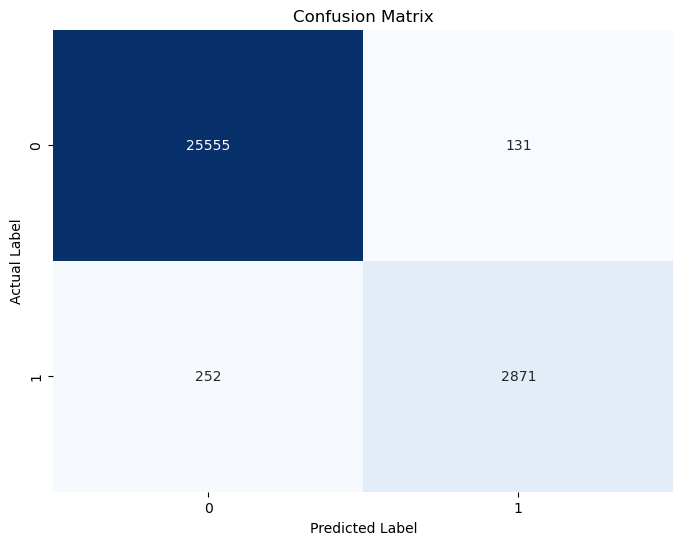

In [41]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [42]:
# Get the coefficients and feature names
coefficients = log_reg.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficient to get the most important features
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Show the top features
print(feature_importance.head(10))

                                   Feature  Coefficient  Abs_Coefficient
2                               Name_Ratio     2.950161         2.950161
9   Rolling_Average_National_Ratio_5_Years     2.581544         2.581544
17             Ends_With_Specified_Letters    -0.690104         0.690104
11              Yearly_Change_Gender_Ratio    -0.675519         0.675519
12            Yearly_Change_National_Ratio    -0.379554         0.379554
4                                Is_Famous     0.306742         0.306742
3                        Gender_Name_Ratio     0.260474         0.260474
8     Rolling_Average_Gender_Ratio_5_Years    -0.172178         0.172178
5                            Gender_Binary    -0.127521         0.127521
14                             Vowel_Count     0.104124         0.104124


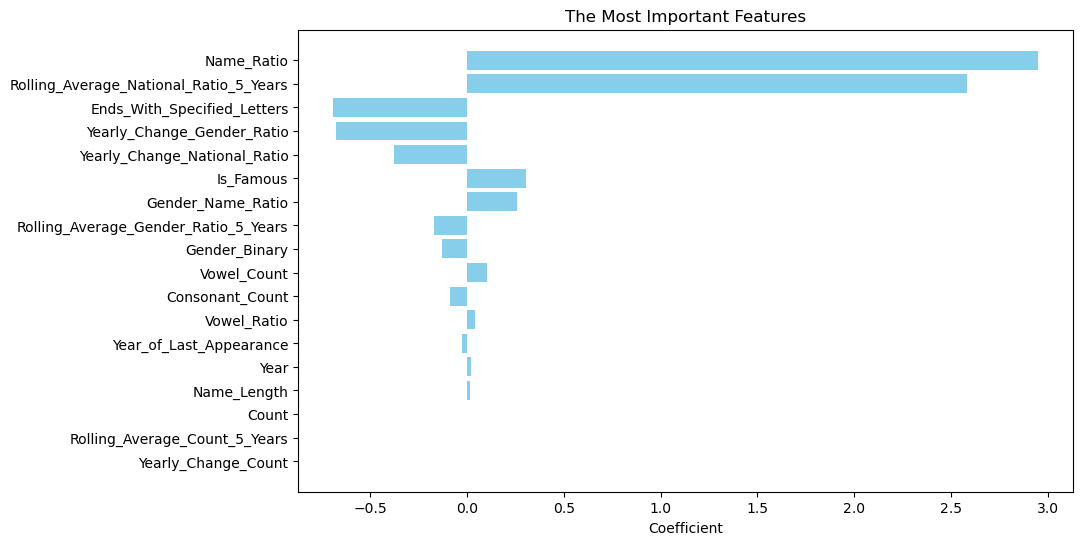

In [43]:
import matplotlib.pyplot as plt

# Plot top 10 most important features
plt.figure(figsize=(10,6))
top_features = feature_importance.head(18)
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('The Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


                                   Feature          VIF
0                                     Year  3415.682331
1                                    Count   195.001515
2                               Name_Ratio  1472.700033
3                        Gender_Name_Ratio  1245.492616
4                                Is_Famous     5.914835
5                            Gender_Binary     2.716766
6                  Year_of_Last_Appearance  3686.248570
7            Rolling_Average_Count_5_Years   170.943036
8     Rolling_Average_Gender_Ratio_5_Years  1071.728373
9   Rolling_Average_National_Ratio_5_Years  1274.200630
10                     Yearly_Change_Count    16.925481
11              Yearly_Change_Gender_Ratio   196.388018
12            Yearly_Change_National_Ratio   217.113999
13                             Name_Length          inf
14                             Vowel_Count          inf
15                         Consonant_Count          inf
16                             Vowel_Ratio   189

In [45]:
Resonable feature: Is_Famous, Gender_Binary, Ends_With_Specified_Letters

SyntaxError: invalid syntax (1060216650.py, line 1)

Duplicated information: Vowel_Count + Consonant_Count = Name_Length
Drop:
Consonant_Count
Name_Ratio and Gender_Name_Ratio. Rolling_Average_Gender_Ratio_5_Years 
Rolling_Average_National_Ratio_5_Years
Yearly_Change_Gender_Ratio
Yearly_Change_National_Ratio

### Key Features

In [46]:
df_new=df_num.drop(columns=[ 'Consonant_Count', 'Name_Ratio', 
                         'Gender_Name_Ratio', 'Rolling_Average_Gender_Ratio_5_Years',
                         'Rolling_Average_National_Ratio_5_Years', 'Yearly_Change_Gender_Ratio',
                         'Yearly_Change_National_Ratio','Year_of_Last_Appearance','Vowel_Ratio',
                          'Rolling_Average_Count_5_Years', 'Name_Length'
                        ])  

In [47]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Define column groups
binary_features = ['Is_Famous', 'Gender_Binary', 'Ends_With_Specified_Letters']
continuous_features = ['Year', 'Count',  'Yearly_Change_Count','Vowel_Count']


# Create preprocessing transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', 'passthrough', binary_features),  # Leave binary features as they are
        ('continuous', Pipeline([
            ('scaler', StandardScaler()),  # Apply StandardScaler to continuous features
            ('transformer', PowerTransformer())  # Apply PowerTransformer if needed
        ]), continuous_features)
    ]
)

# Initialize and fit the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


X = df_new.drop(columns=['Is_Top_100' ])  
                         
y = df_new['Is_Top_100']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
pipeline.fit(X_train)
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Get feature names after transformation
# For continuous features
continuous_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['scaler'].get_feature_names_out()
# For binary features, they remain the same
binary_feature_names = binary_features

# Combine feature names
feature_names = list(binary_feature_names) + list(continuous_feature_names)

# Create DataFrames for transformed data
df_train_scaled = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train.index)
df_test_scaled = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)



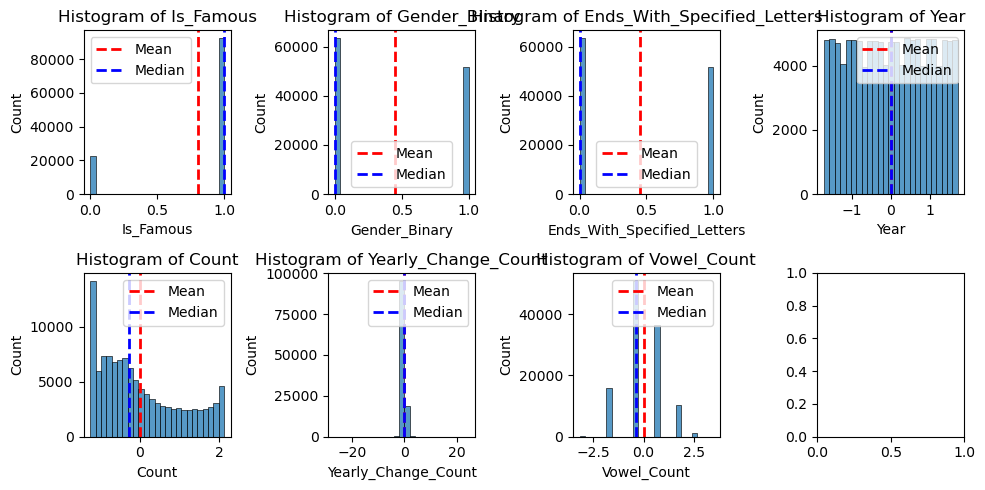

In [48]:
plt.subplots(2, 4, figsize=(10, 5))

for idx, col in enumerate(df_train_scaled.columns):
    plt.subplot(2, 4, idx + 1)
    sns.histplot(df_train_scaled[col], bins=25)
    plt.axvline(df_train_scaled[col].mean(), label="Mean", color='red', ls ='--', lw=2)
    plt.axvline(df_train_scaled[col].median(), label="Median", color='blue', ls ='--', lw=2)
    plt.title(f'Histogram of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Classification Report
class_report = classification_report(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)


Training Accuracy: 0.9554
Test Accuracy: 0.9563
Confusion Matrix:
[[25465   221]
 [ 1039  2084]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     25686
           1       0.90      0.67      0.77      3123

    accuracy                           0.96     28809
   macro avg       0.93      0.83      0.87     28809
weighted avg       0.95      0.96      0.95     28809



In [50]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

                       Feature        VIF
0                         Year  16.123300
1                        Count   1.371971
2                    Is_Famous   5.342957
3                Gender_Binary   2.650337
4          Yearly_Change_Count   1.139552
5                  Vowel_Count  11.072029
6  Ends_With_Specified_Letters   3.133881


In [51]:
df_new['Year'] = df_new['Year'] - 1880

In [52]:
X = df_new.drop(columns=['Is_Top_100'])  
                         
y = df_new['Is_Top_100']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Define column groups
binary_features = ['Is_Famous', 'Gender_Binary', 'Ends_With_Specified_Letters']
continuous_features = ['Year', 'Count',  'Yearly_Change_Count','Vowel_Count']


# Create preprocessing transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', 'passthrough', binary_features),  # Leave binary features as they are
        ('continuous', Pipeline([
            ('scaler', StandardScaler()),  # Apply StandardScaler to continuous features
            ('transformer', PowerTransformer())  # Apply PowerTransformer if needed
        ]), continuous_features)
    ]
)

# Initialize and fit the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


X = df_new.drop(columns=['Is_Top_100' ])  
                         
y = df_new['Is_Top_100']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
pipeline.fit(X_train)
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Get feature names after transformation
# For continuous features
continuous_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['scaler'].get_feature_names_out()
# For binary features, they remain the same
binary_feature_names = binary_features

# Combine feature names
feature_names = list(binary_feature_names) + list(continuous_feature_names)

# Create DataFrames for transformed data
df_train_scaled = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train.index)
df_test_scaled = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)



In [54]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Classification Report
class_report = classification_report(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(class_report)

Training Accuracy: 0.9584
Test Accuracy: 0.9592
Confusion Matrix:
[[25348   338]
 [  838  2285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     25686
           1       0.87      0.73      0.80      3123

    accuracy                           0.96     28809
   macro avg       0.92      0.86      0.89     28809
weighted avg       0.96      0.96      0.96     28809



In [ ]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

### Part 4.2 - Clustering 

We can start clustering the data using three different methods and evaluate their overall performance. We will be using 

- K-Means 
- Gaussian Mixture Model
- Hierarchical Clustering (Agglomerative)

In [55]:
# First we need to create a subset of the data
df_samp = data2.sample(frac=0.25, random_state=45)

In [56]:
df_samp.shape

(36010, 21)

In [57]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

In [58]:
# we will test different values for the number of clusters
ks= np.arange(2,10)# we test cluster sizes from 2 to9

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [60]:
# Define column groups
binary_features = ['Is_Famous', 'Gender_Binary']
continuous_features = [
    'Year', 'Count', 'Name_Ratio', 'Gender_Name_Ratio', 'Year_of_Last_Appearance',
    'Rolling_Average_Count_5_Years', 'Rolling_Average_Gender_Ratio_5_Years',
    'Rolling_Average_National_Ratio_5_Years', 'Yearly_Change_Count',
    'Yearly_Change_Gender_Ratio', 'Yearly_Change_National_Ratio', 'Name_Length',
    'Vowel_Count', 'Consonant_Count', 'Vowel_Ratio', 'Ends_With_Specified_Letters'
]

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', 'passthrough', binary_features),
        ('continuous', Pipeline([
            ('scaler', StandardScaler()), 
            ('transformer', PowerTransformer()) 
        ]), continuous_features)
    ]
)

# Fit the scaler only on the training data
pipeline = Pipeline([('preprocessor', preprocessor)])
pipeline.fit(X_train)

# Transform both training and test sets
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Create DataFrames for transformed data
df_train_scaled = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train.index)
df_test_scaled = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)


ValueError: A given column is not a column of the dataframe

In [ ]:
df_train_scaled.shape

In [61]:
df_train_scaled.isna().sum()

Is_Famous                      0
Gender_Binary                  0
Ends_With_Specified_Letters    0
Year                           0
Count                          0
Yearly_Change_Count            0
Vowel_Count                    0
dtype: int64

In [62]:
silScoresK=[]
silScoresA=[]
silScoresG=[]

for k in ks:
    print(f'We are currently on k={k}')
    # kmeans
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_train_scaled)
    silScoresK.append(silhouette_score(df_train_scaled, kmeans.labels_))
    
  
    # agglomerative clustering
    agglom=AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglom.fit(df_train_scaled)
    silScoresA.append(silhouette_score(df_train_scaled, agglom.labels_))
    

    # gaussian
    gmm=GaussianMixture(n_components=k)
    gmm.fit(df_train_scaled)
    silScoresG.append(silhouette_score(df_train_scaled, gmm.predict(df_train_scaled)))

We are currently on k=2


KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(ks,silScoresK, label="Kmeans", color='green')
plt.plot(ks,silScoresA, label="Agglomerative", color='blue')
plt.plot(ks,silScoresG, label="Gaussian", color='red')
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans to the scaled training data
kmeans.fit(df_train_scaled)

# Predict cluster labels
kmeans_labels = kmeans.predict(df_train_scaled)

# Add cluster labels to the DataFrame
df_train_scaled['kmeans_label'] = kmeans_labels

# Print the DataFrame with cluster labels
print(df_train_scaled.head(1))


In [63]:
df_train_scaled.shape

(115233, 7)

In [64]:
from sklearn.decomposition import PCA

# Fit PCA to the correctly preprocessed data
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_transformed)

# Check PCA components
print(f'Shape of PCA components: {pca.components_.shape}')

# Create the DataFrame with PCA loadings
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=feature_names)

# Display the loadings DataFrame
print(loadings_df.head())


Shape of PCA components: (3, 7)
                                  PC1       PC2       PC3
Is_Famous                    0.060119  0.045775  0.000106
Gender_Binary                0.051130  0.197934 -0.020669
Ends_With_Specified_Letters -0.093179 -0.278875 -0.006535
Year                         0.669614 -0.157674  0.240483
Count                        0.702121 -0.072928 -0.008046


In [65]:
# Count the number of samples in each cluster
cluster_counts = df_train_scaled['kmeans_label'].value_counts()
print(cluster_counts)


KeyError: 'kmeans_label'

In [ ]:
from sklearn.decomposition import PCA

# Assuming df_train_scaled contains only the scaled features and no PCA components
# Perform PCA on df_train_scaled
myPCA = PCA(n_components=3)
pca_results = myPCA.fit_transform(df_train_scaled.drop(columns=['kmeans_label']))

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_results, columns=[f'PC{i+1}' for i in range(pca_results.shape[1])], index=df_train_scaled.index)

# Add kmeans labels to the PCA DataFrame
pca_df['kmeans_label'] = df_train_scaled['kmeans_label']

# Print the DataFrame to confirm PCA components and labels are present
print(pca_df.head())


In [66]:
import matplotlib.pyplot as plt

# Check the column names in pca_df
print(pca_df.columns)

# Plot clusters using the first two PCA components
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['kmeans_label'], cmap='viridis', s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Visualization in PCA-reduced Space')
plt.colorbar(label='Cluster Label')
plt.show()


NameError: name 'pca_df' is not defined

In [67]:
# Plot PCA component loadings
loadingsDF = pd.DataFrame(myPCA.components_.T, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

plt.subplots(3, 1, figsize=(10, 30))

plt.subplot(3, 1, 1)
loadingsDF['PC1'].sort_values(ascending=True).plot(kind='barh')
plt.title('PC1')

plt.subplot(3, 1, 2)
loadingsDF['PC2'].sort_values(ascending=True).plot(kind='barh')
plt.title('PC2')

plt.subplot(3, 1, 3)
loadingsDF['PC3'].sort_values(ascending=True).plot(kind='barh')
plt.title('PC3')

plt.subplots_adjust(wspace=0.8)
plt.show()


NameError: name 'myPCA' is not defined

In [ ]:
np,sum(myPCA.explained_variance_ratio_)

In [ ]:
# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(my_pca_results, columns=['PC1', 'PC2', 'PC3'])
pca_df['kmeans_label'] = kmeans_labels

In [ ]:
pca_df.shape

In [ ]:
# Print the column names and check for any discrepancies
print("Feature names used in preprocessing:", feature_names)


In [ ]:
# let's visualize these clusters!
fig=px.scatter_3d(pca_df, x='PC1', y='PC2',z='PC3',color='kmeans_label', opacity=0.5)
fig.show()

In [ ]:

# Drop columns that should not be included in the mean calculation
features_df = df_train_scaled.drop(columns=['kmeans_label'])

# Group by KMeans labels and compute the mean for each feature
featureMeans = features_df.groupby(df_train_scaled['kmeans_label']).mean().T

# Display the resulting DataFrame
print(featureMeans)


In [ ]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: PC1 vs PC2')
plt.colorbar(label='Target Variable')
plt.show()

In [ ]:
# Plotting the feature means for each cluster
featureMeans.plot(kind='bar', figsize=(14, 8))
plt.title('Feature Means by KMeans Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_samp.isna().sum()

In [ ]:
# Group by cluster and compute mean for each feature
cluster_means = df_train_scaled.groupby('kmeans_label').mean()
print(cluster_means)


In [ ]:
from sklearn.metrics import silhouette_score

# Drop the 'kmeans_label' column for evaluation
features = df_train_scaled.drop(columns=['kmeans_label'])

# Compute silhouette score
silhouette_avg = silhouette_score(features, df_train_scaled['kmeans_label'])
print(f'Silhouette Score: {silhouette_avg:.4f}')


In [ ]:
# Filter data for smaller cluster
smaller_cluster = df_train_scaled[df_train_scaled['kmeans_label'] == 1]
print(smaller_cluster.describe())


In [ ]:
# Assuming df_train_scaled and df_samp have the same indices
df_samp['kmeans_label'] = df_train_scaled['kmeans_label']


In [ ]:
# Ensure the number of subplots matches the number of features
num_features = len(df_samp.drop(columns=['Name', 'Gender', 'kmeans_label']).columns)
num_rows = (num_features // 4) + (num_features % 4 > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(25, 5*num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through features and plot
for i, col in enumerate(df_samp.drop(columns=['Name', 'Gender', 'kmeans_label']).columns):
    sns.violinplot(y=df_samp[col], x=df_samp['kmeans_label'], ax=axes[i], hue=df_samp['kmeans_label'], palette='viridis')
    axes[i].set_xlabel('Cluster Label')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Spread of {col}')

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()